# Some Variations of Banach's Matchbox Problem

Banach's matchbox problem is a good entry point into stochastic stopping problems. A man buys two matchbooks and puts one in each of his two pockets. He then selects a matchbox at random from either pocket, uses a single match, and then returns the matchbox to the same pocket, absentmindedly not noticing if he has taken the last match. After a certain number of draws, an empty matchbox is selected and found emptied. What is the probability of $k$ matches in the remaining matchbox? 

The problem is given two matchbooks containing $n$ matches each and with a matchbook placed in both the left and right pockets, if a person reaches into one or the other pocket at random with equal probability, what is the probability of there being $k$ matches in the other pocket when the matchbook in the selected pocket is found to be empty?  That is, the person keeps reaching alternatively and at random to sample a match from either pocket until one of the pockets is exhausted of matches.

This is easy to code up in Python using a generator:

In [49]:
import random

random.seed(12345)
def step(n=4):
  'keep track of remaining matches in each matchbook'
  a = b = n
  while a>0 and b>0:
    if random.randint(0,1):
        a-=1
    else:
        b-=1
    yield (a,b)

Thus, suppose there are $n=4$ matches in each matchbook, then a valid sequence of draws from the `(left,right`) pocket is the following:

`[(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)]`

This means that the first draw is from the right pocket leaving `3` matches there and `4` matches in the left pocket. The next draw again
samples a match from the right pocket leaving `2` matches there and `4` in the left pocket. For the following draw, the left pocket is chosen leaving `3` matches there and `2` matches in the right pocket. This continues until the right pocket is emptied `(3,0)`. We can draw this sequence using the following code:

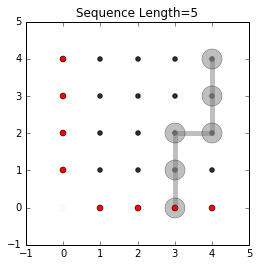

In [50]:
%matplotlib inline
from matplotlib.pylab import subplots,mgrid

fig,ax = subplots()
i,j=mgrid[0:5,0:5]
ax.scatter(i.flat,j.flat,alpha=.8,color='black')
ax.set_aspect(1)
x,y=zip(*[(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)])
ax.plot((4,)+x,(4,)+y,marker='o',markersize=20,
        alpha=.5,color='gray',lw=5)
ax.set_title('Sequence Length=%d'%(len(x)))
ax.plot([0,]*4,range(1,5),'or')
ax.plot(range(1,5),[0,]*4,'or')
ax.plot(0,0,'ow',mec='w'); # remove origin

In the figure above, the red circles indicate the termination points where one of the pockets has been emptied. The `(4,4)` point is the starting point with incremental steps moving down and to the left until one of the red circles is encountered. The length of the sequence is indicated in the title. In this case it took five draws in total to exhaust one of the matchbooks and terminate the sequence.

The classical matchbox Problem is to find the probability of termination at a particular circle. For example, what is the probability that the sequence terminates with one match left in the other matchbook? In the figure above, this means terminating at `(1,0)` or `(0,1)`.

Specifically, termination at `(1,0)` means accumulating four steps down and three steps left in any sequence. This is the same as the $n$ *choose* $k$ binomial coefficient $\texttt{Binom}(n,k)$. We can compute this using `scipy` as the following with $n=7,k=3$:

In [51]:
from scipy.misc import comb
print comb(7,3,exact=True)

35


This means that there are `35` ways to reach `(1,0)` from `(4,4)` Out of the total number of ways there are to any of the termination  points (red circles). Likewise, to reach the `(0,1)` Termination point, we need to accumulate four moves to the left and three steps down, as computed below:

In [52]:
print comb(7,4, exact=True)

35


Now following this pattern, all we have to do is count for all the other termination points.


|termination point  | num of paths|
|--------------------:|-------------|
|`(4,0)`|1|
|`(0,4)`|1|
|`(3,0)` | 5|
|`(0,3)` | 5|
|`(2,0)` | 5|
|`(0,2)` | 5|
|`(1,0)` | 35|
|`(0,1)` | 35|


| Name   | A   | B   | C   |
|--------|----:|----:|----:|
|Fish    |2.34 |3.23 |3.00 |
|Chicken |1.55 |1.23 |1.22 |
|Pork    |2.22 |3.32 |2.56 |

## Length of Sequence